In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
unfall2019 = pd.read_csv('data/Unfallorte2019_LinRef.csv', delimiter=';', quotechar='"')

FileNotFoundError: [Errno 2] File data/Unfallorte2019_LinRef.csv does not exist: 'data/Unfallorte2019_LinRef.csv'

In [8]:
unfall2019.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
0,1,1,0,57,25,2019,1,5,5,3,...,1,0,0,0,0,"579075,960927323440000","6023531,318255106000000","10,216713530000050","54,353460244000075",1
1,2,1,0,3,0,2019,1,6,2,3,...,1,0,0,0,0,"611914,920398440210000","5968419,523143058600000","10,701388439000027","53,852200108000034",1
2,3,1,0,53,91,2019,1,7,6,3,...,1,0,0,0,0,"597807,670711245390000","5939158,772521587100000","10,477759560000038","53,592131367000036",1
3,4,1,0,62,76,2019,1,5,6,3,...,1,0,0,0,0,"570688,991616101940000","5957625,627219760800000","10,072328698000035","53,762448160000076",2
4,5,1,0,1,0,2019,1,8,5,3,...,1,0,0,0,0,"530059,818000000900000","6073467,298000000400000","9,467680689000076","54,807468400000062",1


In [9]:
#Aus der Spalte Bundesland alle Zeilen löschen außer Hamburg (Wert=2) 
unfall2019 = unfall2019[unfall2019.ULAND == 2]

In [10]:
unfall2019.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
6118,6119,2,4,5,409,2019,4,12,2,3,...,1,0,0,0,0,"566306,898549227040000","5938672,308777563300000","10,001815250000050","53,592690385000026",0
6122,6123,2,3,7,319,2019,1,15,5,3,...,1,0,0,1,0,"561501,251956302670000","5944563,441032247600000","9,930382355000063","53,646221604000061",0
6130,6131,2,1,6,115,2019,2,18,4,3,...,1,0,0,0,0,"567006,100197231400000","5933713,052668681400000","10,011313495000024","53,548031842000057",0
6134,6135,2,1,4,111,2019,2,7,4,3,...,1,0,0,0,0,"564214,999957438560000","5934017,071644265200000","9,969257017000075","53,551112908000050",0
6140,6141,2,2,6,218,2019,4,7,3,3,...,1,0,0,0,0,"559522,479056822140000","5935079,057005249000000","9,898640593000039","53,561210447000065",0


In [11]:
#Kontrolle, ob nur Hamburg in Liste ist
unfall2019["ULAND"].value_counts() 

2    6827
Name: ULAND, dtype: int64

In [12]:
#Kontrolle, ob in IstRad noch 1 und 0 vorhanden
unfall2019["IstRad"].value_counts() 

0    4517
1    2310
Name: IstRad, dtype: int64

In [13]:
#Aus der Spalte mit den Fahrradunfällen alle Zeilen löschen in denen kein Unfall stattfand 
#0 = Unfall ohne Fahrradbeteiligung, 1 = Unfall mit Fahrradbeteiligung
unfall2019 = unfall2019[unfall2019.IstRad == 1]

In [14]:
#Kontrolle, ob in IstRad nur noch 1 vorhanden
unfall2019["IstRad"].value_counts() 

1    2310
Name: IstRad, dtype: int64

In [1]:
unfall2019.describe()

NameError: name 'unfall2019' is not defined

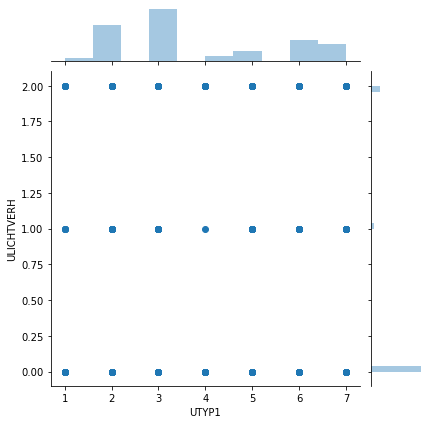

In [16]:
#Auffälligkeit Lichtverhältnisse und Art des Unfalls
#Lichtverhältnisse: 0 = Tageslicht 1 = Dämmerung 2 = Dunkelheit
#Unfalltyp 1 = Fahrunfall 2 = Abbiegeunfall 3 = Einbiegen / Kreuzen-Unfall 4 = Überschreiten-Unfall
#5 = Unfall durch ruhenden Verkehr 6 = Unfall im Längsverkehr 7 = sonstiger Unfall
sns.jointplot(x='UTYP1', y='ULICHTVERH', data=unfall2019)
plt.show()

In [73]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


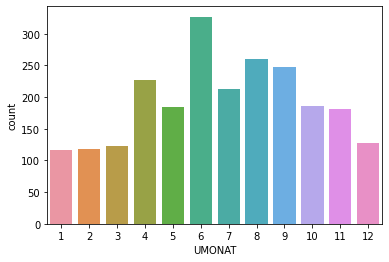

In [17]:
sns.countplot(data=unfall2019, x='UMONAT')